# 1. Cel ćwiczenia

In [23]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
from scipy import ndimage
import pandas as pd
import seaborn as snb
from itertools import product
import glob
import os

HARALIC_DISTANCES = [1, 2, 3]
HARALIC_ANGLES = [0, np.pi/4, np.pi/2, 3*np.pi/4]

HARALIC_ANGLES_STRINGS = ['0', 'pi/4', 'pi/2', '3*pi/4']

KSIZE = 6
THETA = np.pi / 1
SIGMA = 3.0
LAMBDA = 5.0
GAMMA = 0.25

In [24]:
# Funkcje haralickie
def calculate_haralick_features(image):
    # Konwersja do obrazu w skali szarości
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Oblicz macierz współwystępowania szarości (GLCM)
    distances = HARALIC_DISTANCES # Wybrane odległości
    angles = HARALIC_ANGLES # Wybrane kąty
    glcm = graycomatrix(gray_image, distances, angles, symmetric=True, normed=True)
    # Oblicz cechy haralickie: kontrast, korelacja, energia, odchylenie standardowe
    contrast = graycoprops(glcm, 'contrast')
    correlation = graycoprops(glcm, 'correlation')
    energy = graycoprops(glcm, 'energy')
    std_dev = graycoprops(glcm, 'homogeneity')
    return contrast, correlation, energy, std_dev

# Filtrowanie obrazu za pomocą filtru Gabora
def apply_gabor_filter(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Parametry filtru Gabora
    ksize = KSIZE
    theta = THETA
    sigma = SIGMA
    lambd = LAMBDA
    gamma = GAMMA
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma)
    # Filtracja obrazu przy użyciu filtru Gabora
    filtered_image = cv2.filter2D(gray_image, cv2.CV_8UC3, gabor_kernel)
    return filtered_image

def create_column_names(feature):
    return [f'{feature}_step_{a}_angle_{b}' for a,b in list(product(HARALIC_DISTANCES,HARALIC_ANGLES_STRINGS))]

In [25]:
image_paths = glob.glob("images/basalt/*") + glob.glob("images/granite/*") + glob.glob("images/limestone/*")
image_paths

['images/basalt/istockphoto-1456650485-612x612.jpg',
 'images/basalt/360_F_435371679_BE6Caog7SC6NhCyaK87X7ngurGOwPG8R.jpg',
 'images/basalt/360_F_440295724_nf9K9xW25CbwPmhWXqA70o6vSqIVbb1E.jpg',
 'images/basalt/360_F_306015659_2nyvBRahCSL0b2mojGoO22LIT7FajoNc.jpg',
 'images/basalt/1.jpg',
 'images/basalt/360_F_315052544_Np8JW5Y5XNggXoAuAnH2ioTc9IcKCnfP.jpg',
 'images/granite/depositphotos_38500317-stock-photo-granite-texture.jpg',
 'images/granite/granite-2311854_640.jpg',
 'images/granite/what_is_this_2.jpg',
 'images/granite/Silver+Gray+Granite+Cover+WM+1.jpg',
 'images/granite/what_is_this_3.jpg',
 'images/granite/1000_F_210890250_yXn99stp3wOqHXP751WdwN1hvzqi8BFw.jpg',
 'images/granite/bf0c493bf27bdee9ee25c2290e916d89.jpg',
 'images/granite/what_is_this_1.jpg',
 'images/granite/74eddb85476a60a87706359ad64d7a2d.jpg',
 'images/granite/1.jpg',
 'images/limestone/images.jpeg',
 'images/limestone/Polished.jpg',
 'images/limestone/rough-limestone-5fc4cd2dd3792-1200.jpg',
 'images/limeston

Analiza tekstur dla obrazu 1
Kontrast: [[219.22899497 272.86119037 171.66095477 355.605313  ]
 [442.78040404 272.86119037 387.58181818 355.605313  ]
 [577.3584264  463.20151005 510.86550761 599.11605959]], Korelacja: [[0.76316588 0.70556781 0.81454976 0.61632308]
 [0.52209341 0.70556781 0.58181991 0.61632308]
 [0.37751436 0.50128615 0.44956301 0.35516167]], Energia: [[0.02064385 0.01918539 0.02116192 0.01818886]
 [0.01752221 0.01918539 0.01765743 0.01818886]
 [0.01661924 0.01709202 0.01669673 0.0164121 ]], Odchylenie standardowe: [[0.11902524 0.09923288 0.12117904 0.08703788]
 [0.08089513 0.09923288 0.07931649 0.08703788]
 [0.0697841  0.07288245 0.06873733 0.06550642]]


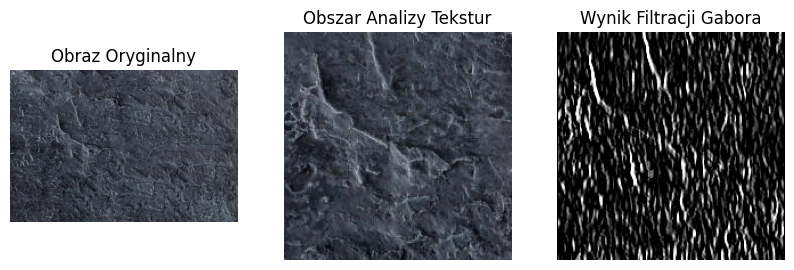

Analiza tekstur dla obrazu 2
Kontrast: [[311.30834171 383.6902351  309.9491206  388.19249514]
 [434.42623737 383.6902351  434.07       388.19249514]
 [411.56637056 426.53466483 414.79845178 421.35312723]], Korelacja: [[0.4190285  0.28327562 0.4209063  0.27486726]
 [0.1889778  0.28327562 0.18783307 0.27486726]
 [0.23125773 0.20175078 0.22288466 0.21165116]], Energia: [[0.02062707 0.01999233 0.02061701 0.01997054]
 [0.01977341 0.01999233 0.01980102 0.01997054]
 [0.01982194 0.01974519 0.01983047 0.01978761]], Odchylenie standardowe: [[0.07708395 0.06920792 0.07709762 0.06813985]
 [0.06366889 0.06920792 0.06536555 0.06813985]
 [0.06608512 0.06568259 0.0656547  0.06728362]]


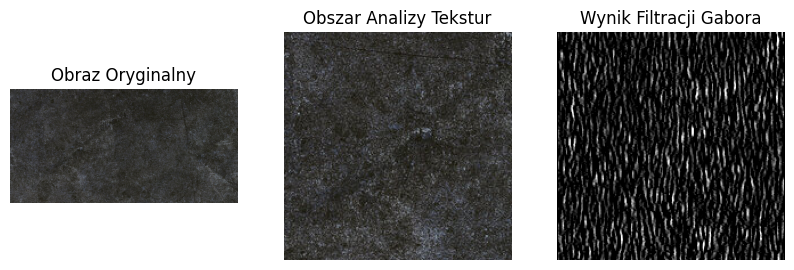

Analiza tekstur dla obrazu 3
Kontrast: [[292.99140704 233.76568774 280.56379397 509.57958132]
 [509.30022727 233.76568774 497.99820707 509.57958132]
 [546.38243655 369.39212835 532.43459391 584.57703296]], Korelacja: [[0.63781053 0.71126315 0.65390668 0.37059689]
 [0.36977145 0.71126315 0.38616328 0.37059689]
 [0.32348742 0.54362304 0.34393272 0.27784115]], Energia: [[0.01653492 0.01733657 0.01673586 0.01508827]
 [0.01503727 0.01733657 0.01511163 0.01508827]
 [0.01492658 0.01587602 0.01492561 0.01475454]], Odchylenie standardowe: [[0.07457474 0.08373373 0.07697933 0.05617937]
 [0.05634068 0.08373373 0.05659777 0.05617937]
 [0.05333904 0.06613446 0.0548271  0.05307709]]


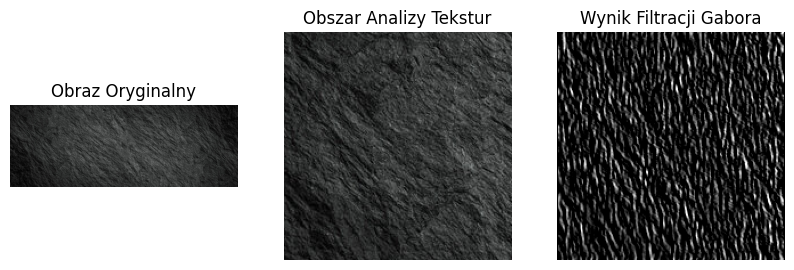

Analiza tekstur dla obrazu 4
Kontrast: [[367.59050251 678.66664983 520.7951005  576.13259766]
 [694.50189394 678.66664983 902.13050505 576.13259766]
 [809.0371066  954.64819916 997.89941624 851.9905877 ]], Korelacja: [[0.71355535 0.47134423 0.59438821 0.55122067]
 [0.45881988 0.47134423 0.2972974  0.55122067]
 [0.36913841 0.25629993 0.22228872 0.33627469]], Energia: [[0.01586792 0.01357391 0.01440522 0.01425711]
 [0.0135648  0.01357391 0.01282397 0.01425711]
 [0.01295545 0.01250799 0.01248308 0.01293941]], Odchylenie standardowe: [[0.08100781 0.05800097 0.06542971 0.06477764]
 [0.05844798 0.05800097 0.0509325  0.06477764]
 [0.05211488 0.0470964  0.04586491 0.05096937]]


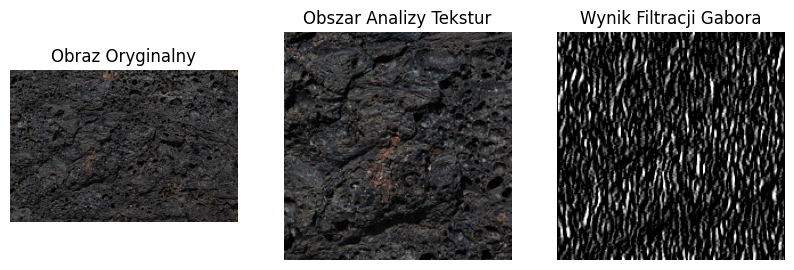

Analiza tekstur dla obrazu 5
Kontrast: [[ 61.35422111 130.81192394  72.22399497  97.77823792]
 [160.21671717 130.81192394 191.79777778  97.77823792]
 [223.21824873 267.99885216 270.38220812 198.73862361]], Korelacja: [[0.84230705 0.66403491 0.81456153 0.74887429]
 [0.58838438 0.66403491 0.50821865 0.74887429]
 [0.42719674 0.31296436 0.30800134 0.49053905]], Energia: [[0.02990142 0.02504255 0.02867622 0.02650128]
 [0.02413968 0.02504255 0.02327687 0.02650128]
 [0.02268851 0.02197263 0.02192484 0.02302887]], Odchylenie standardowe: [[0.17397745 0.11372086 0.15636598 0.13201425]
 [0.10991485 0.11372086 0.09993974 0.13201425]
 [0.09184134 0.08017141 0.08132205 0.09493315]]


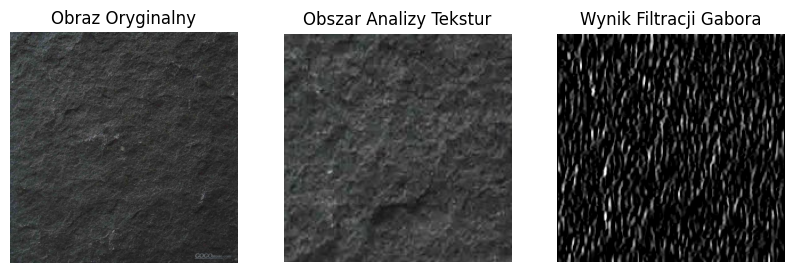

Analiza tekstur dla obrazu 6
Kontrast: [[194.74233668 177.93394106 192.01386935 396.7772531 ]
 [436.31873737 177.93394106 443.70714646 396.7772531 ]
 [565.05847716 331.44000612 579.27203046 655.34407203]], Korelacja: [[0.85607734 0.86842044 0.85803244 0.70658343]
 [0.67749658 0.86842044 0.67164146 0.70658343]
 [0.58236445 0.75466882 0.5709892  0.51488459]], Energia: [[0.01778704 0.01819329 0.01794925 0.01535184]
 [0.01498603 0.01819329 0.01500141 0.01535184]
 [0.0140681  0.0160235  0.01411626 0.0136779 ]], Odchylenie standardowe: [[0.11780702 0.12011219 0.12074361 0.08780422]
 [0.08382198 0.12011219 0.08153761 0.08780422]
 [0.0731452  0.09542282 0.07257937 0.06615089]]


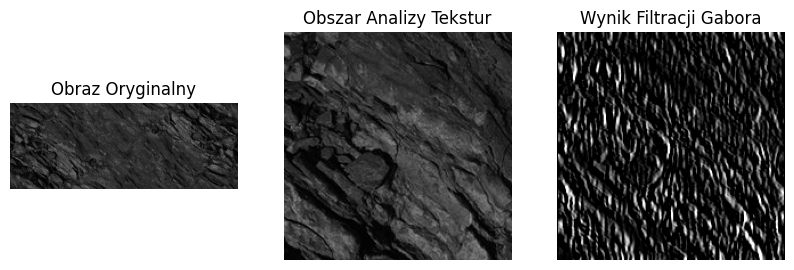

Analiza tekstur dla obrazu 7
Kontrast: [[ 483.45831658  799.93684503  572.60836683  862.39541931]
 [1128.56325758  799.93684503 1240.10818182  862.39541931]
 [1502.70218274 1447.84914805 1563.30550761 1499.03599123]], Korelacja: [[0.80714269 0.6811173  0.77232274 0.65616944]
 [0.5492074  0.6811173  0.50753897 0.65616944]
 [0.39933183 0.42292835 0.37926153 0.40226765]], Energia: [[0.01830667 0.01601349 0.01732503 0.01619638]
 [0.01529168 0.01601349 0.01484818 0.01619638]
 [0.01441185 0.01432828 0.01423925 0.01452258]], Odchylenie standardowe: [[0.10182162 0.07532583 0.09140033 0.07655908]
 [0.06664227 0.07532583 0.06218364 0.07655908]
 [0.05716677 0.05564145 0.05470494 0.05726224]]


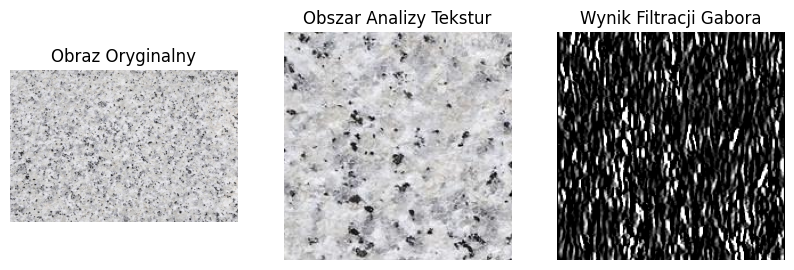

Analiza tekstur dla obrazu 8
Kontrast: [[ 438.11776382  641.76136966  452.91047739  658.44127674]
 [ 874.68065657  641.76136966  893.98585859  658.44127674]
 [1069.84819797 1054.28818488 1092.81824873 1039.37664524]], Korelacja: [[0.77270205 0.66689033 0.76457257 0.65823439]
 [0.54678312 0.66689033 0.53514017 0.65823439]
 [0.44613131 0.45326479 0.43090528 0.46107385]], Energia: [[0.01337625 0.01240233 0.01334532 0.01243536]
 [0.01167232 0.01240233 0.01168927 0.01243536]
 [0.01121175 0.01124636 0.01115948 0.0112813 ]], Odchylenie standardowe: [[0.07654501 0.06592932 0.07621908 0.06504907]
 [0.05534029 0.06592932 0.0537563  0.06504907]
 [0.0492106  0.05013306 0.04816832 0.0496756 ]]


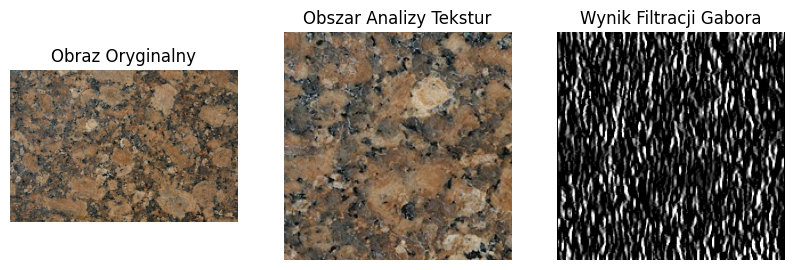

Analiza tekstur dla obrazu 9
Kontrast: [[ 586.99649879  854.19810807  641.42273619  860.45311011]
 [ 983.12413606  854.19810807 1011.83599945  860.45311011]
 [1058.95983361 1064.41117419 1039.16055014 1054.46102188]], Korelacja: [[0.51506689 0.29576192 0.47029767 0.29061527]
 [0.18723196 0.29576192 0.16479254 0.29061527]
 [0.12425136 0.12217829 0.14536186 0.13041663]], Energia: [[0.01952355 0.0184648  0.01925499 0.01835694]
 [0.01811091 0.0184648  0.01799578 0.01835694]
 [0.01786129 0.01773221 0.01776527 0.01786933]], Odchylenie standardowe: [[0.07995767 0.06723256 0.07968144 0.06572001]
 [0.06287896 0.06723256 0.06045384 0.06572001]
 [0.05845049 0.05920427 0.0573672  0.05976431]]


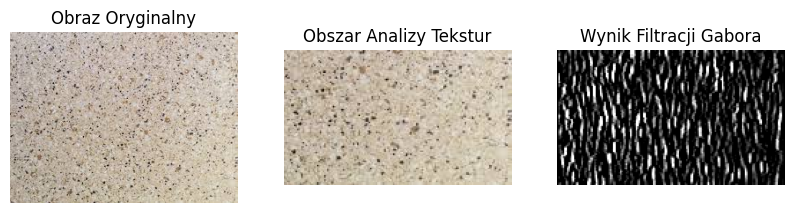

Analiza tekstur dla obrazu 10
Kontrast: [[1942.13070352 2545.31635565 2326.55731156 2860.2079998 ]
 [3445.66654041 2545.31635565 3527.10883838 2860.2079998 ]
 [3117.70875635 2948.09894398 3161.27220812 3146.84037343]], Korelacja: [[0.65629168 0.54914709 0.58782306 0.49339133]
 [0.39027668 0.54914709 0.37437972 0.49339133]
 [0.44839781 0.4772216  0.43852346 0.44201492]], Energia: [[0.00782509 0.00745703 0.00755845 0.0073504 ]
 [0.00715077 0.00745703 0.00709045 0.0073504 ]
 [0.00718971 0.00722962 0.00713092 0.00716814]], Odchylenie standardowe: [[0.04161445 0.03575946 0.03584218 0.0330176 ]
 [0.03013155 0.03575946 0.02940551 0.0330176 ]
 [0.03069864 0.03207048 0.02975634 0.03031136]]


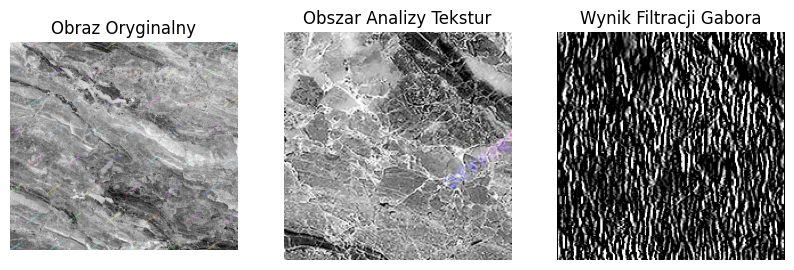

Analiza tekstur dla obrazu 11
Kontrast: [[ 439.45736181  800.00840888  487.80570352  807.89820964]
 [1231.0779798   800.00840888 1337.10015152  807.89820964]
 [1924.59111675 1878.83677686 2051.86218274 1890.34759208]], Korelacja: [[0.9195164  0.85331842 0.91040168 0.85187198]
 [0.7749076  0.85331842 0.75423202 0.85187198]
 [0.64869908 0.65582221 0.622708   0.6537148 ]], Energia: [[0.01173348 0.01027786 0.01141622 0.01031411]
 [0.00944448 0.01027786 0.00928194 0.01031411]
 [0.00860243 0.00862581 0.00850214 0.00866538]], Odchylenie standardowe: [[0.09068886 0.06826479 0.08773572 0.06800436]
 [0.05509032 0.06826479 0.05384298 0.06800436]
 [0.04495129 0.04505439 0.04200242 0.0451251 ]]


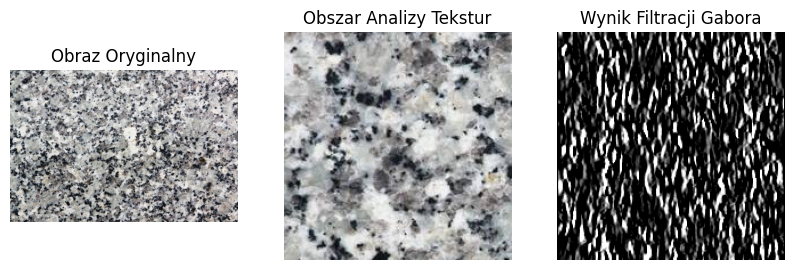

Analiza tekstur dla obrazu 12
Kontrast: [[ 684.52331658 1104.65079165  769.18736181 1203.63379713]
 [1657.55060606 1104.65079165 1794.53916667 1203.63379713]
 [2346.2156599  2241.15108152 2469.43913706 2358.62154372]], Korelacja: [[0.84560234 0.75114665 0.82662701 0.72883787]
 [0.6263181  0.75114665 0.59589558 0.72883787]
 [0.47144136 0.49591033 0.44447377 0.4693806 ]], Energia: [[0.01570318 0.01426858 0.0154735  0.01415338]
 [0.0130996  0.01426858 0.01295048 0.01415338]
 [0.01208683 0.01217029 0.01190813 0.01203407]], Odchylenie standardowe: [[0.08466757 0.06975849 0.08221579 0.06932819]
 [0.05780449 0.06975849 0.05646525 0.06932819]
 [0.04900792 0.0486944  0.04746615 0.04834944]]


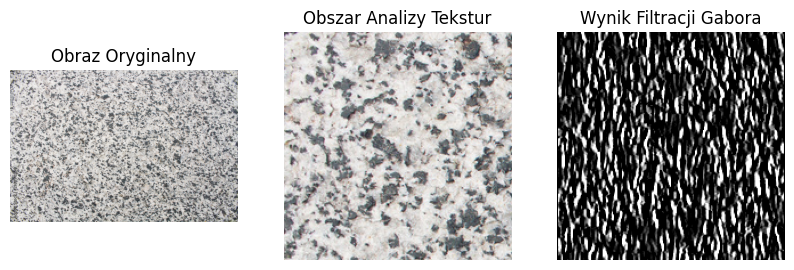

Analiza tekstur dla obrazu 13
Kontrast: [[1048.27896985 1745.68399788 1248.6211809  1861.70313881]
 [2435.12825758 1745.68399788 2832.73611111 1861.70313881]
 [3275.97796954 3333.32172737 3741.28923858 3435.16044281]], Korelacja: [[0.81672642 0.6949201  0.78153506 0.67464993]
 [0.57446812 0.6949201  0.50452136 0.67464993]
 [0.42758725 0.41791635 0.3462013  0.40015478]], Energia: [[0.010977   0.01001942 0.01062071 0.00993242]
 [0.00950453 0.01001942 0.00919842 0.00993242]
 [0.00895443 0.00887687 0.00863677 0.00883386]], Odchylenie standardowe: [[0.06521508 0.0551394  0.06169062 0.05290435]
 [0.04588948 0.0551394  0.04345098 0.05290435]
 [0.039517   0.03925963 0.03663632 0.03856647]]


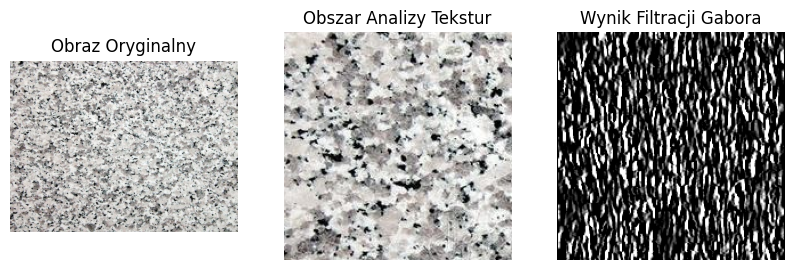

Analiza tekstur dla obrazu 14
Kontrast: [[ 383.20062814  676.68841696  477.7861809   751.84750385]
 [ 987.91459596  676.68841696 1063.81997475  751.84750385]
 [1421.70469543 1277.88873584 1382.75677665 1491.2557137 ]], Korelacja: [[0.92345239 0.8647956  0.90456559 0.84978269]
 [0.80258975 0.8647956  0.78748577 0.84978269]
 [0.7158032  0.74454688 0.72353897 0.70191225]], Energia: [[0.01014906 0.00894692 0.00969348 0.00880846]
 [0.00835345 0.00894692 0.00822981 0.00880846]
 [0.00776175 0.0078907  0.00783574 0.00771237]], Odchylenie standardowe: [[0.07798058 0.05596716 0.06902921 0.05300902]
 [0.04815028 0.05596716 0.04649662 0.05300902]
 [0.03997774 0.04094152 0.04097548 0.03753583]]


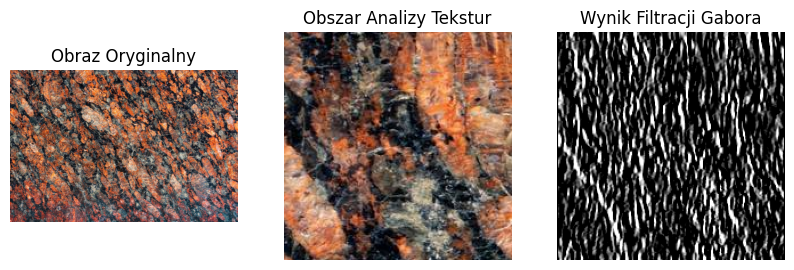

Analiza tekstur dla obrazu 15
Kontrast: [[ 439.45736181  800.00840888  487.80570352  807.89820964]
 [1231.0779798   800.00840888 1337.10015152  807.89820964]
 [1924.59111675 1878.83677686 2051.86218274 1890.34759208]], Korelacja: [[0.9195164  0.85331842 0.91040168 0.85187198]
 [0.7749076  0.85331842 0.75423202 0.85187198]
 [0.64869908 0.65582221 0.622708   0.6537148 ]], Energia: [[0.01173348 0.01027786 0.01141622 0.01031411]
 [0.00944448 0.01027786 0.00928194 0.01031411]
 [0.00860243 0.00862581 0.00850214 0.00866538]], Odchylenie standardowe: [[0.09068886 0.06826479 0.08773572 0.06800436]
 [0.05509032 0.06826479 0.05384298 0.06800436]
 [0.04495129 0.04505439 0.04200242 0.0451251 ]]


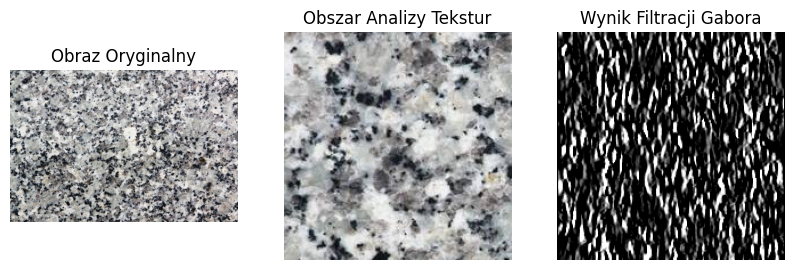

Analiza tekstur dla obrazu 16
Kontrast: [[ 172.87341709  320.59632333  167.17449749  332.65000884]
 [ 617.17643939  320.59632333  600.10159091  332.65000884]
 [1186.29713198 1052.66636058 1162.66309645 1092.64416896]], Korelacja: [[0.9794859  0.96192194 0.98012364 0.96049117]
 [0.92685509 0.96192194 0.92859278 0.96049117]
 [0.85960133 0.87502563 0.8615531  0.87029519]], Energia: [[0.01502988 0.01306804 0.01535087 0.01295275]
 [0.01135304 0.01306804 0.01157507 0.01295275]
 [0.00998682 0.01036477 0.01014703 0.01022802]], Odchylenie standardowe: [[0.14754103 0.1085161  0.14928458 0.10801233]
 [0.08366262 0.1085161  0.08400082 0.10801233]
 [0.06307248 0.06661432 0.06404373 0.0640555 ]]


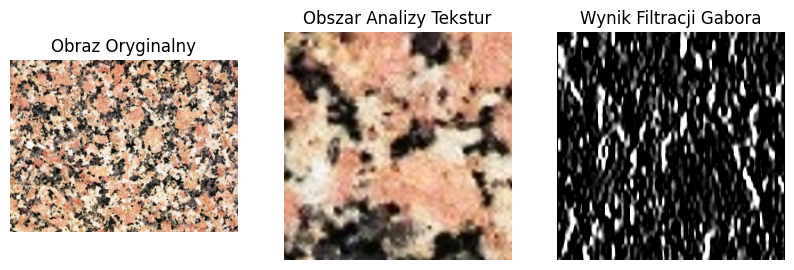

Analiza tekstur dla obrazu 17
Kontrast: [[117.63387097 176.62454475 130.15393548 176.74395161]
 [192.38634146 176.62454475 222.1304065  176.74395161]
 [223.66944262 227.8921277  240.75783607 228.36777051]], Korelacja: [[0.61689911 0.4241333  0.57522509 0.42373907]
 [0.37379603 0.4241333  0.27460663 0.42373907]
 [0.27213887 0.25685231 0.21339129 0.25533781]], Energia: [[0.02816135 0.02541069 0.02703507 0.02536725]
 [0.02504525 0.02541069 0.02450091 0.02536725]
 [0.02444614 0.0243347  0.02421107 0.02421361]], Odchylenie standardowe: [[0.13722178 0.10253946 0.12280256 0.10290029]
 [0.09608234 0.10253946 0.08974413 0.10290029]
 [0.08815161 0.0857086  0.08011701 0.08599947]]


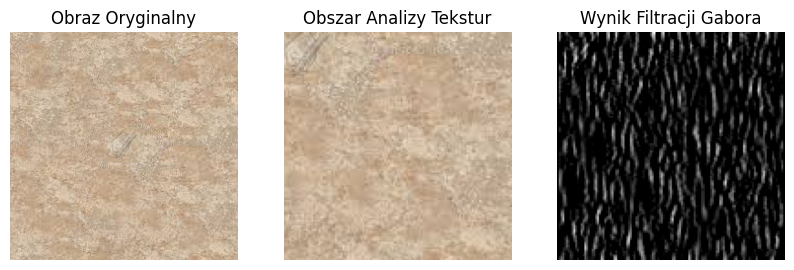

Analiza tekstur dla obrazu 18
Kontrast: [[ 62.34271357  90.40958562  60.72567839  87.30006818]
 [113.10128788  90.40958562 115.80775253  87.30006818]
 [109.2727665  106.47015611 110.91758883 104.82409958]], Korelacja: [[ 0.44407519  0.19284345  0.45805954  0.22061313]
 [-0.00948425  0.19284345 -0.0346647   0.22061313]
 [ 0.02437697  0.04747891  0.00675169  0.06215865]], Energia: [[0.04854719 0.04664363 0.04895542 0.04677093]
 [0.04639734 0.04664363 0.04628907 0.04677093]
 [0.04607133 0.04604904 0.04605913 0.04608834]], Odchylenie standardowe: [[0.16920695 0.14304264 0.17161328 0.14443412]
 [0.13113661 0.14304264 0.13107265 0.14443412]
 [0.13610435 0.13423998 0.13558086 0.13472662]]


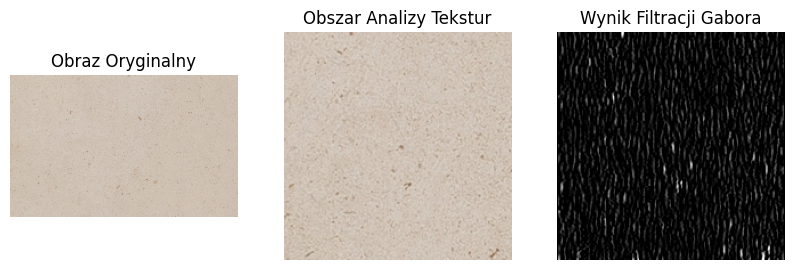

Analiza tekstur dla obrazu 19
Kontrast: [[234.70268844 394.95856165 270.56128141 337.73712785]
 [436.7029798  394.95856165 459.13813131 337.73712785]
 [500.94403553 519.53451178 513.05274112 476.95663708]], Korelacja: [[0.66116449 0.42897251 0.60856273 0.51170333]
 [0.37047137 0.42897251 0.33542532 0.51170333]
 [0.27850722 0.24967384 0.25702048 0.31109092]], Energia: [[0.01887726 0.01719965 0.01845111 0.01762493]
 [0.01688716 0.01719965 0.01682059 0.01762493]
 [0.01656642 0.01654234 0.01658435 0.01667697]], Odchylenie standardowe: [[0.08941104 0.06608008 0.08577484 0.07285406]
 [0.06390632 0.06608008 0.06140957 0.07285406]
 [0.05567484 0.05666519 0.05567931 0.05902448]]


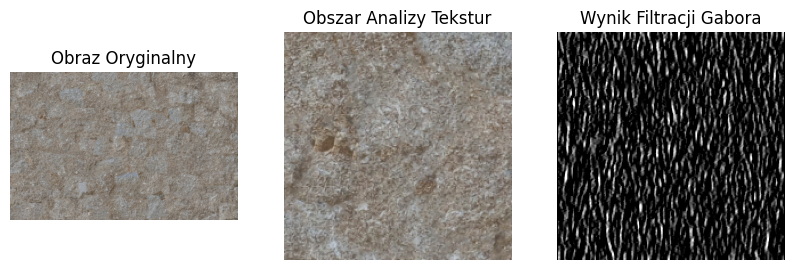

Analiza tekstur dla obrazu 20
Kontrast: [[148.52809045 208.66281155  84.88394472 154.49440671]
 [302.14532828 208.66281155 195.80459596 154.49440671]
 [319.76916244 300.31254464 240.39997462 250.44768391]], Korelacja: [[0.62209215 0.46925646 0.78402427 0.60704386]
 [0.23084961 0.46925646 0.50184695 0.60704386]
 [0.18547297 0.23578554 0.38878883 0.36268462]], Energia: [[0.02495563 0.02364043 0.02801311 0.02479849]
 [0.0224654  0.02364043 0.02380011 0.02479849]
 [0.02223959 0.02247823 0.02306081 0.02300282]], Odchylenie standardowe: [[0.10942818 0.09398781 0.1427451  0.10899017]
 [0.07993906 0.09398781 0.09732469 0.10899017]
 [0.0772011  0.07991876 0.08870197 0.08712919]]


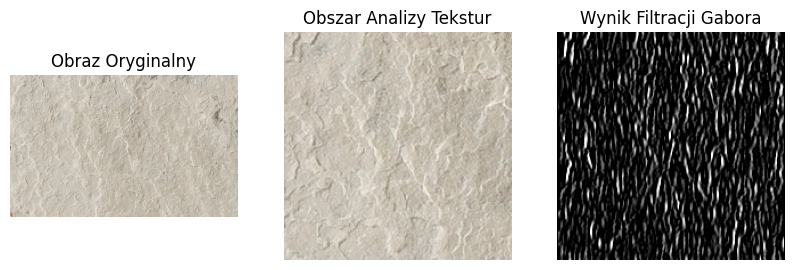

Analiza tekstur dla obrazu 21
Kontrast: [[ 34.67522613  74.89363905  62.81929648  76.59468195]
 [ 69.69116162  74.89363905 114.23853535  76.59468195]
 [ 82.4977665  112.41865626 121.84220812 112.90827467]], Korelacja: [[0.76294091 0.48550528 0.56866749 0.47386282]
 [0.52369649 0.48550528 0.21015779 0.47386282]
 [0.43657022 0.22247801 0.1524195  0.21993368]], Energia: [[0.06421279 0.05245973 0.05512839 0.05226158]
 [0.05350444 0.05245973 0.04823426 0.05226158]
 [0.05116756 0.04779374 0.04687068 0.04783407]], Odchylenie standardowe: [[0.31294385 0.21279057 0.23668135 0.21168559]
 [0.22133566 0.21279057 0.17398704 0.21168559]
 [0.20031056 0.16858674 0.15958022 0.16914719]]


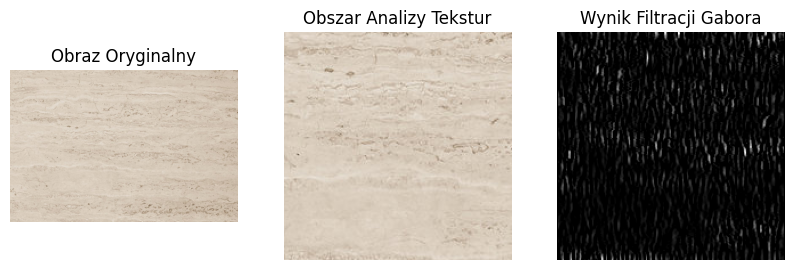

Analiza tekstur dla obrazu 22
Kontrast: [[ 409.59201005  592.24113027  282.97138191  636.21055024]
 [1070.10659091  592.24113027  866.0030303   636.21055024]
 [1544.35563452 1405.60195388 1420.91045685 1457.80823385]], Korelacja: [[0.85058765 0.78383889 0.89676662 0.76778613]
 [0.60940465 0.78383889 0.68392613 0.76778613]
 [0.43575812 0.48647013 0.48123578 0.4673585 ]], Energia: [[0.01197163 0.01089544 0.01283454 0.01087272]
 [0.00987004 0.01089544 0.01015527 0.01087272]
 [0.00920856 0.00928266 0.00923633 0.00928606]], Odchylenie standardowe: [[0.08006396 0.06433085 0.0911507  0.06305527]
 [0.05186446 0.06433085 0.05247652 0.06305527]
 [0.03941162 0.04120253 0.04064247 0.04099685]]


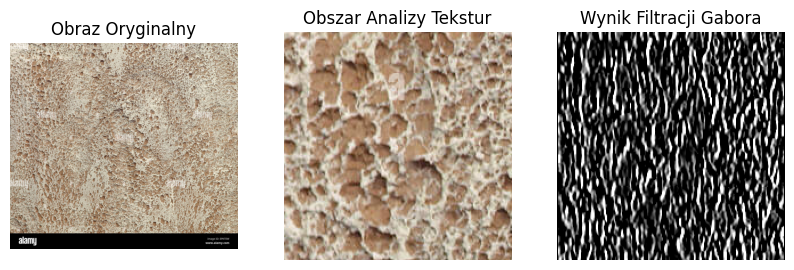

Analiza tekstur dla obrazu 23
Kontrast: [[244.60994975 374.60235853 284.88535176 468.35004167]
 [545.12492424 374.60235853 647.74315657 468.35004167]
 [706.79852792 731.42926742 839.19195431 746.0932813 ]], Korelacja: [[0.82730383 0.73487463 0.7986217  0.66854373]
 [0.61455801 0.73487463 0.54117741 0.66854373]
 [0.49940045 0.48046288 0.40474777 0.47004088]], Energia: [[0.01583338 0.01439516 0.01529444 0.01387544]
 [0.01350113 0.01439516 0.01306426 0.01387544]
 [0.01288735 0.01275494 0.01246875 0.0127194 ]], Odchylenie standardowe: [[0.09149032 0.0724138  0.08488648 0.0655903 ]
 [0.06139419 0.0724138  0.05557651 0.0655903 ]
 [0.05338647 0.05172691 0.04851672 0.05193101]]


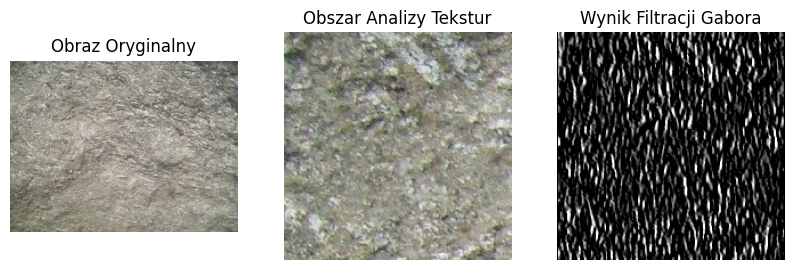

Analiza tekstur dla obrazu 24
Kontrast: [[ 718.79135678  693.32688568  763.63494975 1081.65301381]
 [1039.50825758  693.32688568 1070.34078283 1081.65301381]
 [1062.85063452  985.5959851  1099.8293401  1224.97854811]], Korelacja: [[0.45366755 0.47354779 0.41995309 0.17867974]
 [0.20990399 0.47354779 0.18690398 0.17867974]
 [0.1925526  0.25170211 0.16452999 0.0697119 ]], Energia: [[0.0134147  0.01346893 0.01329179 0.0127912 ]
 [0.0128681  0.01346893 0.01281289 0.0127912 ]
 [0.01279088 0.01291695 0.01276645 0.0127092 ]], Odchylenie standardowe: [[0.0518923  0.05082111 0.0490619  0.04121461]
 [0.04365774 0.05082111 0.04346805 0.04121461]
 [0.0420793  0.0443342  0.04261141 0.04044058]]


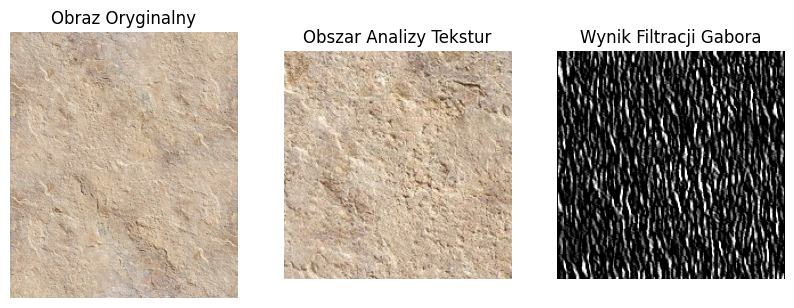

Analiza tekstur dla obrazu 25
Kontrast: [[ 514.72356784 1010.92285548  877.35663317  967.25264514]
 [ 927.34166667 1010.92285548 1224.29159091  967.25264514]
 [1036.95738579 1122.96385573 1158.23388325 1116.41860524]], Korelacja: [[ 0.56270029  0.1419015   0.25515816  0.1789399 ]
 [ 0.21257307  0.1419015  -0.03999949  0.1789399 ]
 [ 0.11985977  0.04674056  0.01604384  0.05224339]], Energia: [[0.01720741 0.01570929 0.01593595 0.0157257 ]
 [0.01574645 0.01570929 0.01548622 0.0157257 ]
 [0.01546863 0.01543243 0.01536044 0.01537498]], Odchylenie standardowe: [[0.07302226 0.05178192 0.05324661 0.05162547]
 [0.05495789 0.05178192 0.0473013  0.05162547]
 [0.05145103 0.05057579 0.0476631  0.04888927]]


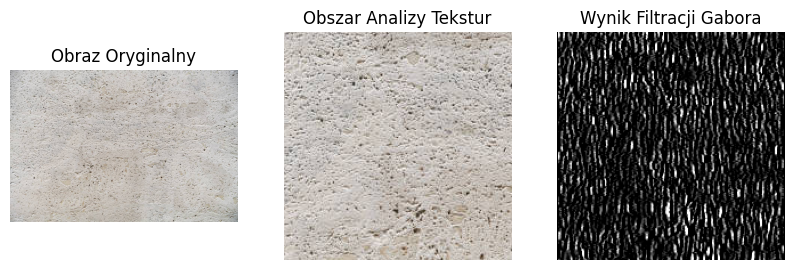

In [26]:
# Wczytanie zestawu obrazów

haralic_features_summary = pd.DataFrame()

# Analiza tekstur dla każdego obrazu
for i, pth in enumerate(image_paths):

    image = cv2.imread(pth)
    # Wybierz obszar obrazu dla analizy tekstur
    region_of_interest = image[100:300, 100:300]
    # Oblicz funkcje haralickie
    contrast, correlation, energy, std_dev = calculate_haralick_features(region_of_interest)

    pth = image_paths[i]
    material = os.path.dirname(pth).removeprefix('images/')

    contrast_df=pd.DataFrame([list(contrast.flatten())],columns=create_column_names('contrast'))
    correlation_df=pd.DataFrame([list(correlation.flatten())],columns=create_column_names('correlation'))
    energy_df=pd.DataFrame([list(energy.flatten())],columns=create_column_names('energy'))
    std_dev_df=pd.DataFrame([list(std_dev.flatten())],columns=create_column_names('std_dev'))

    tmp_df = pd.concat([contrast_df,correlation_df,energy_df,std_dev_df], axis=1)
    tmp_df['material'] = material
    
    if haralic_features_summary.empty:
        haralic_features_summary = tmp_df
    else:
        haralic_features_summary = pd.concat([haralic_features_summary, tmp_df])
    
    # Zastosuj filtr Gabora
    gabor_result = apply_gabor_filter(region_of_interest)# Wyświetl wyniki analizy tekstur
    print(f"Analiza tekstur dla obrazu {i+1}")
    print(f"Kontrast: {contrast}, Korelacja: {correlation}, Energia: {energy}, Odchylenie standardowe: {std_dev}")
    # Wyświetl obraz oryginalny, obszar analizy, oraz wynik filtracji Gabora
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Obraz Oryginalny")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(region_of_interest, cv2.COLOR_BGR2RGB))
    plt.title("Obszar Analizy Tekstur")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(gabor_result, cmap='gray')
    plt.title("Wynik Filtracji Gabora")
    plt.axis("off")
    plt.show()

In [27]:
haralic_features_summary = haralic_features_summary.reset_index()
haralic_features_summary = haralic_features_summary.drop(['index'], axis=1)
haralic_features_summary

contrast_step_1_angle_0  contrast_step_1_angle_pi/4  \
0                219.228995                  272.861190   
1                311.308342                  383.690235   
2                292.991407                  233.765688   
3                367.590503                  678.666650   
4                 61.354221                  130.811924   
5                194.742337                  177.933941   
6                483.458317                  799.936845   
7                438.117764                  641.761370   
8                586.996499                  854.198108   
9               1942.130704                 2545.316356   
10               439.457362                  800.008409   
11               684.523317                 1104.650792   
12              1048.278970                 1745.683998   
13               383.200628                  676.688417   
14               439.457362                  800.008409   
15               172.873417                  320.596323   
16               117.633871                  176.624545   
17                62.342714                   90.409586   
18               234.702688                  394.958562   
19               148.528090                  208.662812   
20                34.675226                   74.893639   
21               409.592010                  592.241130   
22               244.609950                  374.602359   
23               718.791357                  693.326886   
24               514.723568                 1010.922855   

    contrast_step_1_angle_pi/2  contrast_step_1_angle_3*pi/4  \
0                   171.660955                    355.605313   
1                   309.949121                    388.192495   
2                   280.563794                    509.579581   
3                   520.795101                    576.132598   
4                    72.223995                     97.778238   
5                   192.013869                    396.777253   
6                   572.608367                    862.395419   
7                   452.910477                    658.441277   
8                   641.422736                    860.453110   
9                  2326.557312                   2860.208000   
10                  487.805704                    807.898210   
11                  769.187362                   1203.633797   
12                 1248.621181                   1861.703139   
13                  477.786181                    751.847504   
14                  487.805704                    807.898210   
15                  167.174497                    332.650009   
16                  130.153935                    176.743952   
17                   60.725678                     87.300068   
18                  270.561281                    337.737128   
19                   84.883945                    154.494407   
20                   62.819296                     76.594682   
21                  282.971382                    636.210550   
22                  284.885352                    468.350042   
23                  763.634950                   1081.653014   
24                  877.356633                    967.252645   

    contrast_step_2_angle_0  contrast_step_2_angle_pi/4  \
0                442.780404                  272.861190   
1                434.426237                  383.690235   
2                509.300227                  233.765688   
3                694.501894                  678.666650   
4                160.216717                  130.811924   
5                436.318737                  177.933941   
6               1128.563258                  799.936845   
7                874.680657                  641.761370   
8                983.124136                  854.198108   
9               3445.666540                 2545.316356   
10              1231.077980                  800.008409   
11              1657.550606                 1104.650792   
12              2435.128258          

In [28]:
haralic_features_summary.columns

Index(['contrast_step_1_angle_0', 'contrast_step_1_angle_pi/4',
       'contrast_step_1_angle_pi/2', 'contrast_step_1_angle_3*pi/4',
       'contrast_step_2_angle_0', 'contrast_step_2_angle_pi/4',
       'contrast_step_2_angle_pi/2', 'contrast_step_2_angle_3*pi/4',
       'contrast_step_3_angle_0', 'contrast_step_3_angle_pi/4',
       'contrast_step_3_angle_pi/2', 'contrast_step_3_angle_3*pi/4',
       'correlation_step_1_angle_0', 'correlation_step_1_angle_pi/4',
       'correlation_step_1_angle_pi/2', 'correlation_step_1_angle_3*pi/4',
       'correlation_step_2_angle_0', 'correlation_step_2_angle_pi/4',
       'correlation_step_2_angle_pi/2', 'correlation_step_2_angle_3*pi/4',
       'correlation_step_3_angle_0', 'correlation_step_3_angle_pi/4',
       'correlation_step_3_angle_pi/2', 'correlation_step_3_angle_3*pi/4',
       'energy_step_1_angle_0', 'energy_step_1_angle_pi/4',
       'energy_step_1_angle_pi/2', 'energy_step_1_angle_3*pi/4',
       'energy_step_2_angle_0', 'energy_s

<Axes: >

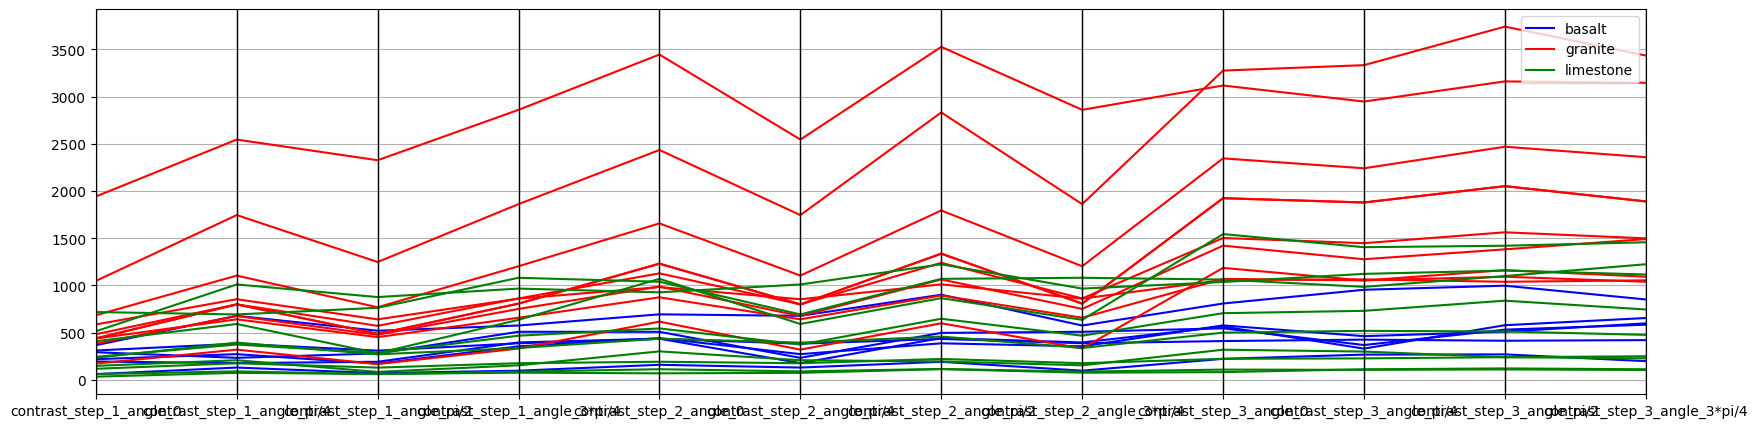

In [29]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(20,5))

df = haralic_features_summary
remove_high_values = True

if remove_high_values:
    df = df.drop([x for x in df.columns if 'contrast' not in x and x != 'material'], axis=1)

parallel_coordinates(frame=df, class_column='material', color=['blue', 'red', 'green'])

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(haralic_features_summary.drop(['material'],axis=1), haralic_features_summary['material'])
models = []


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 48)
(7, 48)
(18,)
(7,)


In [32]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)

acc1 = accuracy_score(predictions, y_test)
models.append({'model':model1, 'accuracy_score':acc1, 'name':"DecisionTreeClassifier"})

[Text(0.6666666666666666, 0.9166666666666666, 'contrast_step_3_angle_pi/4 <= 1200.426\ngini = 0.642\nsamples = 18\nvalue = [4, 6, 8]\nclass = granite'),
 Text(0.5, 0.75, 'correlation_step_1_angle_pi/2 <= 0.807\ngini = 0.521\nsamples = 13\nvalue = [4, 1, 8]\nclass = granite'),
 Text(0.3333333333333333, 0.5833333333333334, 'energy_step_3_angle_pi/4 <= 0.013\ngini = 0.34\nsamples = 10\nvalue = [1, 1, 8]\nclass = granite'),
 Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = basalt'),
 Text(0.5, 0.4166666666666667, 'contrast_step_1_angle_0 <= 550.86\ngini = 0.198\nsamples = 9\nvalue = [0, 1, 8]\nclass = granite'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]\nclass = granite'),
 Text(0.6666666666666666, 0.25, 'correlation_step_2_angle_pi/2 <= 0.176\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = limestone'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = limestone'),
 T

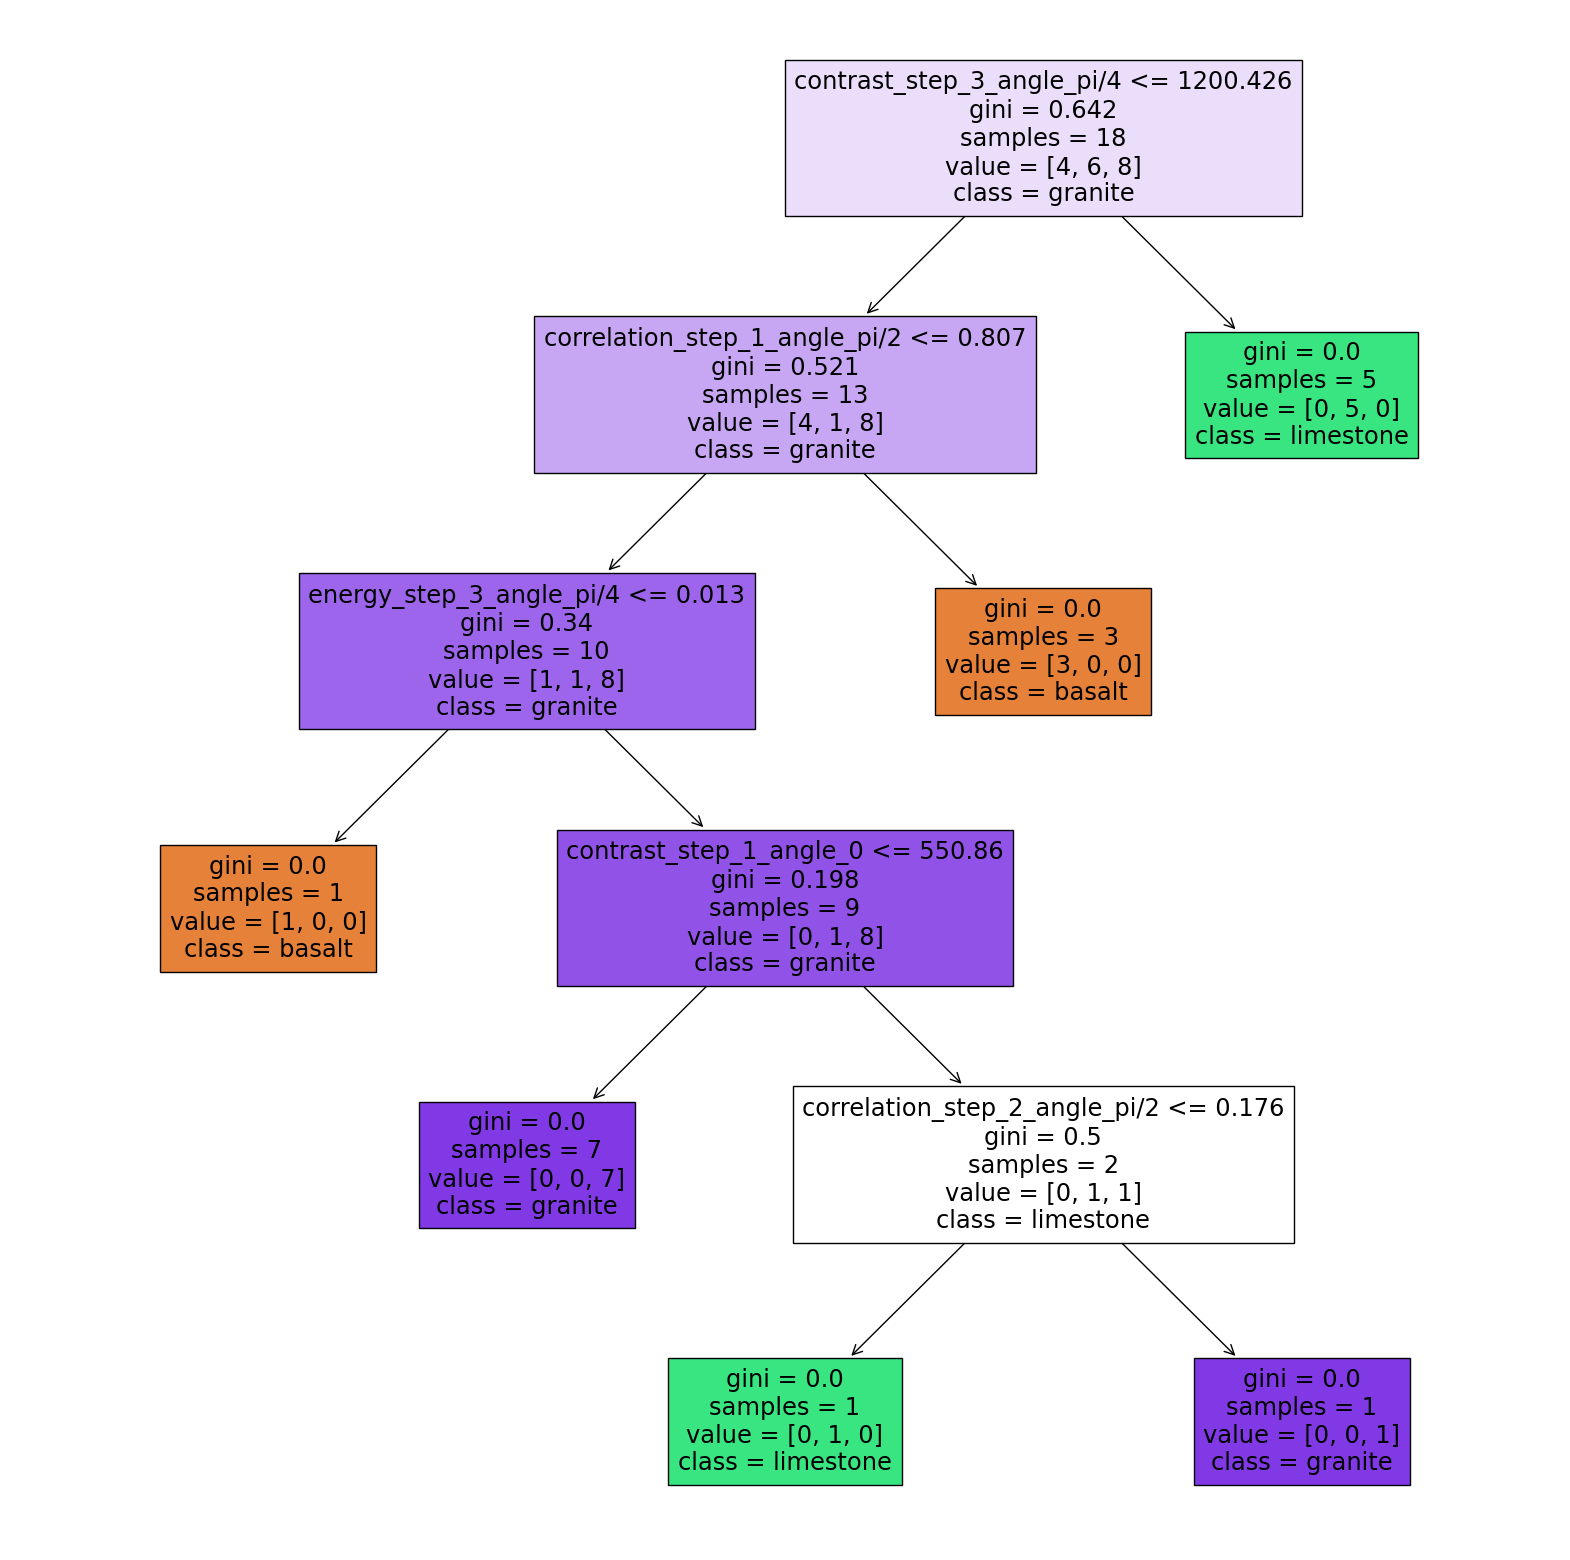

In [33]:
plt.figure(figsize = (20,20))
plot_tree(model1, feature_names=X_train.columns, class_names=y_train.unique() ,filled = True)

In [34]:
model2 = GradientBoostingClassifier(learning_rate=0.2)
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)

acc2 = accuracy_score(predictions, y_test)
models.append({'model':model2, 'accuracy_score':acc2, 'name':"GradientBoostingClassifier"})

In [35]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)
predictions = model3.predict(X_test)

acc3 = accuracy_score(predictions, y_test)
models.append({'model':model3, 'accuracy_score':acc3, 'name':"SVC"})

In [36]:
from sklearn.linear_model import LogisticRegressionCV
model4 = LogisticRegressionCV(verbose=False)
model4.fit(X_train, y_train)
predictions = model4.predict(X_test)

acc4 = accuracy_score(predictions, y_test)
models.append({'model':model4, 'accuracy_score':acc4, 'name':"LogisticRegressionCV"})

/home/michal/University/piao_mgr/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/michal/University/piao_mgr/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/michal/University/piao_mgr/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=7, leaf_size=30)
model5.fit(X_train, y_train)
predictions = model5.predict(X_test)

acc5 = accuracy_score(predictions, y_test)
models.append({'model':model5, 'accuracy_score':acc5, 'name':"KNeighborsClassifier"})

In [38]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train, y_train)
predictions = model6.predict(X_test)

acc6 = accuracy_score(predictions, y_test)
models.append({'model':model6, 'accuracy_score':acc6, 'name':"GaussianNB"})

In [39]:
models

[{'model': DecisionTreeClassifier(),
  'accuracy_score': 0.2857142857142857,
  'name': 'DecisionTreeClassifier'},
 {'model': GradientBoostingClassifier(learning_rate=0.2),
  'accuracy_score': 0.5714285714285714,
  'name': 'GradientBoostingClassifier'},
 {'model': SVC(), 'accuracy_score': 0.2857142857142857, 'name': 'SVC'},
 {'model': LogisticRegressionCV(verbose=False),
  'accuracy_score': 0.42857142857142855,
  'name': 'LogisticRegressionCV'},
 {'model': KNeighborsClassifier(n_neighbors=7),
  'accuracy_score': 0.42857142857142855,
  'name': 'KNeighborsClassifier'},
 {'model': GaussianNB(),
  'accuracy_score': 0.7142857142857143,
  'name': 'GaussianNB'}]

In [44]:
the_best_model = max(models, key=lambda x: x['accuracy_score'])
the_best_model

{'model': GaussianNB(),
 'accuracy_score': 0.7142857142857143,
 'name': 'GaussianNB'}

In [45]:
the_best_model = the_best_model['model']

In [47]:
image = cv2.imread('images/depositphotos_36517671-stock-photo-basalt-stone-texture.jpg')
# Wybierz obszar obrazu dla analizy tekstur
region_of_interest = image[100:300, 100:300]
# Oblicz funkcje haralickie
contrast, correlation, energy, std_dev = calculate_haralick_features(region_of_interest)

contrast_df=pd.DataFrame([list(contrast.flatten())],columns=create_column_names('contrast'))
correlation_df=pd.DataFrame([list(correlation.flatten())],columns=create_column_names('correlation'))
energy_df=pd.DataFrame([list(energy.flatten())],columns=create_column_names('energy'))
std_dev_df=pd.DataFrame([list(std_dev.flatten())],columns=create_column_names('std_dev'))

object = pd.concat([contrast_df,correlation_df,energy_df,std_dev_df], axis=1)

the_best_model.predict(object)

array(['basalt'], dtype='<U9')

In [43]:
# import pickle as pckl
# with open("DTC_model.pkl", 'wb') as f:
#     pckl.dump(the_best_model, f)